In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Stress.csv')
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [4]:
# Describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)
df.dtypes

subreddit            object
post_id              object
sentence_range       object
text                 object
label                 int64
confidence          float64
social_timestamp      int64
dtype: object

In [5]:
# Finding the shape of the data
df.shape

(2838, 7)

In [6]:
#Length of Data
len(df)

2838

In [7]:
threshold = len(df)*0.05
threshold

141.9

In [8]:
#Checking for missing values
df.isna().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [9]:
#Finding Duplicated value
df.duplicated().sum()

0

In [10]:
# Finding Unique values
df.nunique()

subreddit             10
post_id             2343
sentence_range       173
text                2820
label                  2
confidence            10
social_timestamp    2343
dtype: int64

In [11]:
# description of the data in the DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,2838.0,5.243129e-01,4.994965e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
confidence,2838.0,8.089718e-01,1.770383e-01,4.285714e-01,6.000000e-01,8.000000e-01,1.000000e+00,1.000000e+00
social_timestamp,2838.0,1.518107e+09,1.552209e+07,1.483274e+09,1.509698e+09,1.517066e+09,1.530898e+09,1.542592e+09


In [12]:
df.corr()

,label,confidence,social_timestamp
label,1.000000,0.023831,-0.006504
confidence,0.023831,1.000000,0.029101
social_timestamp,-0.006504,0.029101,1.000000


<AxesSubplot:>

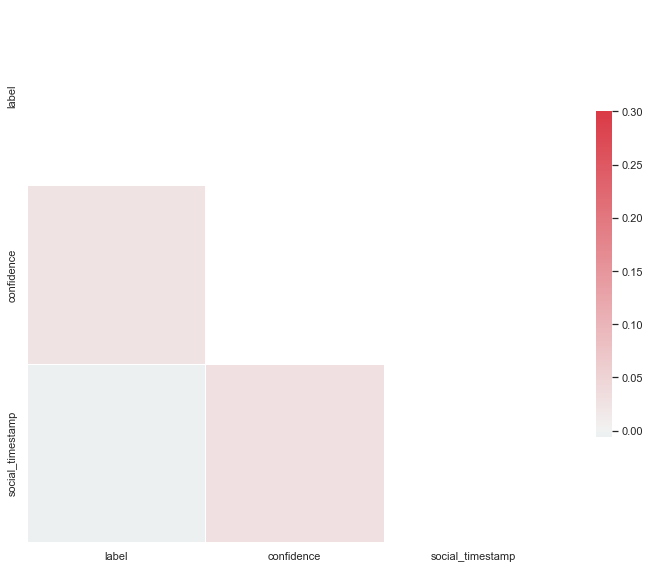

In [13]:
#Correlation
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
#Finding categorical columns in dataset
df.select_dtypes(include='object').columns

Index(['subreddit', 'post_id', 'sentence_range', 'text'], dtype='object')

In [15]:
#Finding numerical columns in dataset
df.select_dtypes(exclude='object').columns

Index(['label', 'confidence', 'social_timestamp'], dtype='object')

In [16]:
# Examine the distribution of labels in the dataset to see if one label is more prevalent than others.

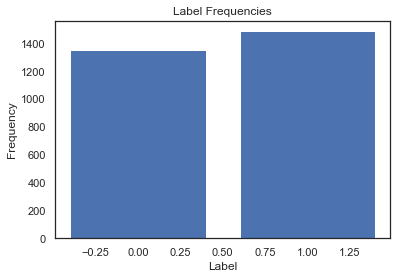

In [17]:
# Get the frequency of each label
label_counts = df['label'].value_counts()

# Plot the bar chart
plt.bar(label_counts.index, label_counts.values)
plt.title('Label Frequencies')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Examine the distribution of sentence lengths in the dataset to see if there are any patterns or outliers. 

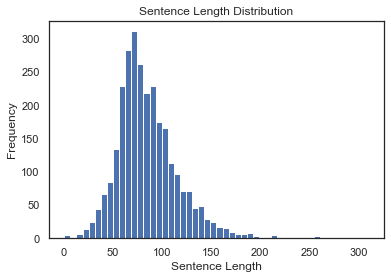

In [19]:
# Calculate the length of each sentence
df['sentence_length'] = df['text'].apply(lambda x: len(x.split()))

# Plot the histogram
plt.hist(df['sentence_length'], bins=50)
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Perform a word frequency analysis on the text data to see which words are most common in the dataset

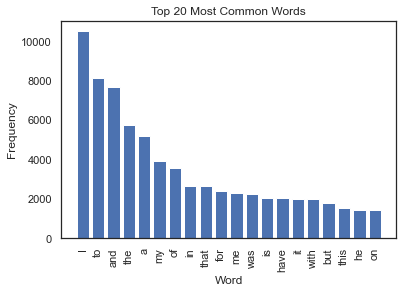

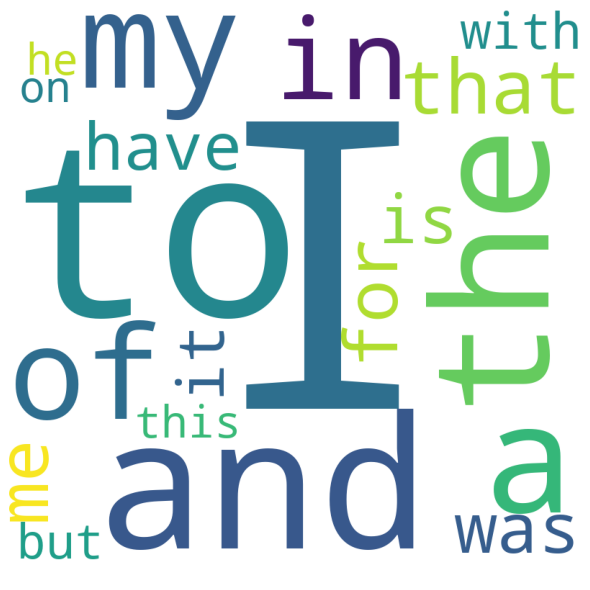

In [21]:
# Combine all text into a single string
text = ' '.join(df['text'])

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Plot the top N most common words
N = 20 # Change this to plot more or fewer words
top_words = dict(word_counts.most_common(N))
plt.bar(top_words.keys(), top_words.values())
plt.title(f'Top {N} Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Plot a word cloud of the top N most common words
wordcloud = WordCloud(width=800, height=800, background_color='white')
wordcloud.generate_from_frequencies(frequencies=top_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
# Time trends: As the dataset includes social_timestamp, Explore any potential time trends in the data.

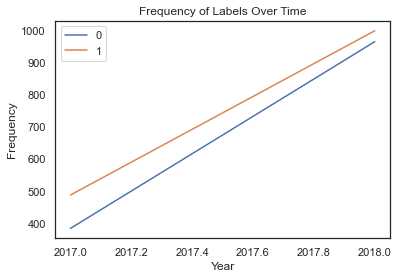

In [23]:
# Convert social_timestamp column to datetime format
df['social_timestamp'] = pd.to_datetime(df['social_timestamp'], unit='s')

# Group the data by label and year
df['year'] = df['social_timestamp'].dt.year
grouped = df.groupby(['label', 'year']).size().reset_index(name='count')

# Plot a line chart of the frequency of each label over time
labels = grouped['label'].unique()
fig, ax = plt.subplots()
for label in labels:
    subset = grouped[grouped['label'] == label]
    ax.plot(subset['year'], subset['count'], label=label)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Labels Over Time')
plt.show()

In [24]:
# Confidence analysis: We can examine the distribution of confidence scores in the dataset to see if there are any patterns or outliers.

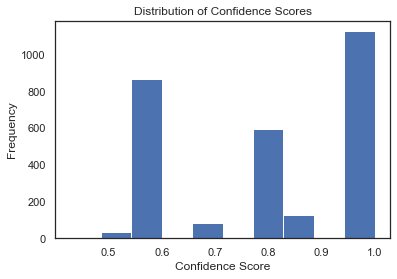

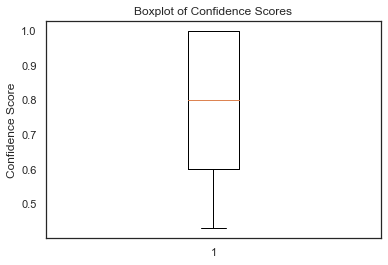

In [25]:
# Plot a histogram of the confidence scores
plt.hist(df['confidence'])
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Distribution of Confidence Scores')
plt.show()

# Plot a boxplot of the confidence scores
plt.boxplot(df['confidence'])
plt.ylabel('Confidence Score')
plt.title('Boxplot of Confidence Scores')
plt.show()

In [26]:
#Preprocessing

In [27]:
#Remove rows with missing data

In [28]:
df.dropna(inplace=True)

In [29]:
#Convert text to lowercase

In [30]:
df['text'] = df['text'].str.lower()

In [31]:
#Remove punctuation

In [32]:
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [33]:
#Remove stop words:

In [34]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to C:\Users\Henry
[nltk_data]     Morgan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
#Feature Engineering

In [36]:
!pip install -U textblob


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# Define a function to compute the sentiment polarity of a text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the 'text' column of the dataset and store the result in a new 'sentiment' column
df['sentiment'] = df['text'].apply(get_sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

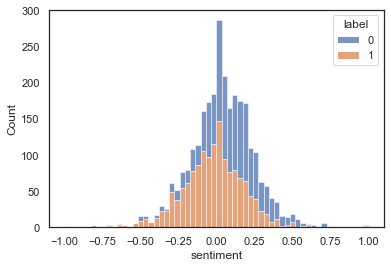

In [38]:
# Compute the sentiment polarity for each text
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the distribution of sentiment scores for each label
sns.histplot(df, x='sentiment', hue='label', multiple='stack')

In [39]:
# Compute the sentiment polarity for each text
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Compute summary statistics of the sentiment scores for each label
summary_stats = df.groupby('label')['sentiment'].agg(['mean', 'median'])

print(summary_stats)

           mean    median
label                    
0      0.097633  0.100000
1     -0.026443 -0.016667


In [40]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,sentence_length,year,sentiment
0,ptsd,8601tu,"(15, 20)",said felt way suggeted go rest trigger ahead y...,1,0.8,2018-03-21 06:39:13,113,2018,0.022727
1,assistance,8lbrx9,"(0, 5)",hey rassistance sure right place post goes im ...,0,1.0,2018-05-22 17:23:37,108,2018,0.360714
2,ptsd,9ch1zh,"(15, 20)",mom hit newspaper shocked would knows dont lik...,1,0.8,2018-09-03 00:46:45,166,2018,0.039273
3,relationships,7rorpp,"[5, 10]",met new boyfriend amazing kind sweet good stud...,1,0.6,2018-01-20 06:25:55,273,2018,0.161810
4,survivorsofabuse,9p2gbc,"[0, 5]",october domestic violence awareness month dome...,1,0.8,2018-10-17 20:43:25,89,2018,-0.166667


In [41]:
# Compute the correlation between the sentiment score and the label
corr = df['sentiment'].corr(df['label'])

print('Correlation between sentiment score and label:', corr)

Correlation between sentiment score and label: -0.2956350811198597


In [42]:
# Split the data into X and y
X = df[['text', 'sentiment']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create a vectorizer to extract word frequencies
vectorizer = CountVectorizer()
word_freq = vectorizer.fit_transform(X['text'])

# Create a SentimentIntensityAnalyzer to get sentiment scores
sia = SentimentIntensityAnalyzer()
sentiment_scores = X['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Combine the word frequencies and sentiment scores into a single dataframe
X_features = pd.DataFrame(word_freq.toarray(), columns=vectorizer.get_feature_names())
X_features['sentence_length'] = X['text'].apply(lambda x: len(x.split()))
X_features['sentiment_score'] = sentiment_scores

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Create a random forest classifier and fit it to the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7147887323943662
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       263
           1       0.71      0.78      0.75       305

    accuracy                           0.71       568
   macro avg       0.72      0.71      0.71       568
weighted avg       0.71      0.71      0.71       568



In [44]:
# Get predicted labels for the test set
y_pred = rfc.predict(X_test)

# Get indices of misclassified examples
misclassified_idx = np.where(y_test != y_pred)[0]

# Print number of misclassified examples
print("Number of misclassified examples: ", len(misclassified_idx))

# Print examples of misclassified text and their true/predicted labels
for idx in misclassified_idx:
    print("Text: ", X_test.iloc[idx]['text'])
    print("True label: ", y_test.iloc[idx])
    print("Predicted label: ", y_pred[idx])
    print("\n")

Number of misclassified examples:  162
Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  0
Predicted label:  1


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  0
Predicted label:  1


Text:  0.0
True label:  0
Predicted label:  1


Text:  0.0
True label:  0
Predicted label:  1


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  0
Predicted label:  1


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  0
Predicted label:  1


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  0
Predicted label:  1


Text:  0.0
True label:  1
Predicted label:  0


Text:  0.0
True label:  0
Predicted label:  1


T

In [45]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[167  96]
 [ 66 239]]


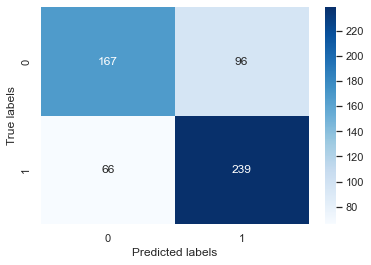

In [46]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [47]:
# Define function to extract features from text data
def extract_features(data):
    # Initialize sentiment analyzer
    sia = SentimentIntensityAnalyzer()
    
    # Extract word frequency features
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    word_freq = vectorizer.fit_transform(data['text'])
    
    # Extract sentiment score features
    sentiment_score = data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
    
    # Extract sentence length features
    sentence_length = data['text'].apply(lambda x: len(x.split()))
    
    # Combine features into single array
    features = np.column_stack((word_freq.toarray(), sentiment_score, sentence_length))
    
    return features

# Split the data into X and y
X = extract_features(df)
y = df['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Evaluate model performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Confusion matrix:\n{cm}")
print(classification_report(y_test, y_pred))

# Examine feature importances
features = vectorizer.get_feature_names() + ['sentiment_score', 'sentence_length']
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(20):
    print(f"{f+1}. feature '{features[indices[f]]}' ({importances[indices[f]]:.2f})")


Accuracy: 0.6954225352112676
Confusion matrix:
[[163 100]
 [ 73 232]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       263
           1       0.70      0.76      0.73       305

    accuracy                           0.70       568
   macro avg       0.69      0.69      0.69       568
weighted avg       0.70      0.70      0.69       568

Feature ranking:
1. feature 'assess' (0.09)
2. feature '600' (0.02)
3. feature 'assessment' (0.02)
4. feature '125' (0.01)
5. feature 'accomplishing' (0.01)
6. feature '39m' (0.01)
7. feature 'arguing' (0.01)
8. feature 'addict' (0.01)
9. feature 'acting' (0.01)
10. feature 'ambitious' (0.01)
11. feature 'achievements' (0.00)
12. feature '815' (0.00)
13. feature '12lbs' (0.00)
14. feature 'appending' (0.00)
15. feature 'assault' (0.00)
16. feature 'affinity' (0.00)
17. feature 'apologizing' (0.00)
18. feature 'agreements' (0.00)
19. feature 'arranging' (0.00)
20. feature '90' (0.00)
